# 线性回归
TensorFlow在线性回归中的应用
- 首先随机生成某条直线范围内的散点图
- 再通过TensorFlow拟合这个图上的点

## 1.随机某条直线范围内的点

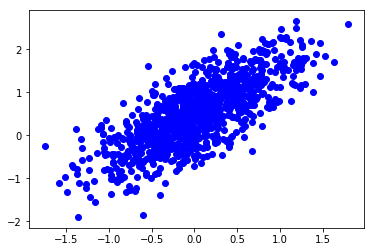

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 随机生成1000个点，围绕在y=x+0.5的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 + 0.5 + np.random.normal(0.0, 0.5)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data,c='b')
plt.show()

## 2.构建回归模型

### 2.1 定义一些算子

In [2]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数，[1]表示在-1到1之间选择一个数
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维的b矩阵，初始值是0
b = tf.Variable(tf.zeros([1]), name='b')
# 经过计算得出预估值y
y = W * x_data + b

# 以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
# 采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

## 2.2 创建对话

In [8]:
sess = tf.Session()

# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

# 初始化的W和b是多少
print("W =", sess.run(W), "b =",sess.run(b), "lossess.run(b)s =", sess.run(loss))
# 执行15次训练
for step in range(15):
    sess.run(train)
    # 输出训练好的W和b
    print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))

W = [-0.24273562] b = [ 0.] lossess.run(b)s = 1.02339
W = [ 0.17196918] b = [ 0.5103417] loss = 0.478427
W = [ 0.44680232] b = [ 0.5075236] loss = 0.352186
W = [ 0.63125718] b = [ 0.50565594] loss = 0.295322
W = [ 0.75505424] b = [ 0.50440252] loss = 0.269708
W = [ 0.83814079] b = [ 0.5035612] loss = 0.25817
W = [ 0.89390445] b = [ 0.50299662] loss = 0.252973
W = [ 0.93133026] b = [ 0.50261766] loss = 0.250632
W = [ 0.95644867] b = [ 0.50236332] loss = 0.249577
W = [ 0.97330689] b = [ 0.50219268] loss = 0.249102
W = [ 0.98462135] b = [ 0.50207812] loss = 0.248888
W = [ 0.99221504] b = [ 0.50200123] loss = 0.248792
W = [ 0.99731153] b = [ 0.50194961] loss = 0.248749
W = [ 1.00073206] b = [ 0.50191498] loss = 0.248729
W = [ 1.0030278] b = [ 0.50189173] loss = 0.24872
W = [ 1.00456858] b = [ 0.50187612] loss = 0.248716


通过结构可以看出：w接近1，b接近0.5。

## 3 绘制曲线

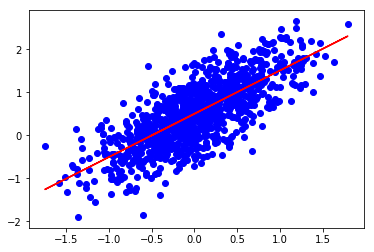

In [10]:
plt.scatter(x_data,y_data,c='b')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b),c = 'r')
plt.show()